# COMP0124 MAAI Individual Coursework 

This 50-point individual coursework has four parts,
the Matrix Game, the Stochastic Game, the Nonzero-sum Game and Deep Multi-Agent Reinforcement Learning.

## Instructions
1.   To start this CW, please duplicate this notebook at first:
  - Choose "File => Save a copy in Drive" and open/run it in Colab.
  - Or you can download the notebook and run it in your local jupyter notebook server.
2.   For the coding assignment, please write your code at `### TODO ###` blocks or in a new cell. For analysis report, you are free to use as many blocks as you need.
3.   Before submitting your notebook, **make sure that it runs without errors**, we also provide a validation tool in the end of this notebook.
  - To check this, reload your notebook and the Python kernel, and run the notebook from the first to the last cell.
  - Please do not change any methods or variables' name in the notebook, otherwise, you cannot get marking correctly.
  - We would not help you debug the code, if we cannot run your submitted notebook, you will get zero point. 
4.  Download your notebook and submit it on Moodle.
  - Click on "File -> Download .ipynb".
  - Rename your notebook to ***firstname_lastname_studentnumber.ipynb***. (Please strictly follow the naming requirement.)
  - Upload to Moodle.
5. This CW would due by **23:55 26/03/2021**, please submit your .ipynb file through the [submission entrance](https://moodle.ucl.ac.uk/mod/assign/view.php?id=1685901).
6. If you have any questions, please contact TAs: [Minne Li](minne.li@cs.ucl.ac.uk), [Oliver Slumbers](o.slumbers@cs.ucl.ac.uk), [Xihan Li](xihan.li.20@ucl.ac.uk), [Xidong Feng](xidong.feng@cs.ucl.ac.uk), and [Mengyue Yang](m.yang@cs.ucl.ac.uk).

## Part I: Matrix Game (10 points)

We start with the simplest setting: Matrix Game (a.k.a Stage Game/Normal Form Game). In this part, you will try to solve the matrix game with full knowledge of the payoff for each player in the game.



Given a two-player, two-action matrix game, we have the payoff matrices as follows:
$$
\mathbf{R}^1 = \left[\begin{matrix}
0 & 3 \\
1 &2
\end{matrix}\right] 
\quad 
\mathbf{R}^2 = \left[\begin{matrix}
3 & 2 \\
0 & 1
\end{matrix}\right]
$$

Each player selects an action from the action space $\{1,2\}$ which determines the payoffs to the players. If the player 1 chooses action $i$ and the player 2 chooses action $j$, then the player 1 and player2 receive the rewards $r^1_{ij}$ and $r^2_{ij}$ respectively. For example, if both players choose action $1$, then the player 1 would have $r^1_{11}=0$ and player 1 would receive $r^2_{11}=3$.

Then, we can use $\alpha\in [0,1] $ represents the strategy for player 1, where $\alpha$ corresponds to the probability of player 1 selecting the first action (action 1), and $1-\alpha$ is the probability of choosing the second action (action 2). Similarly, we use $\beta$ to be the strategy for player 2.

Given the pair of strategies $(\alpha, \beta)$, we can have the expected payoffs for two players. Denote $V^1(\alpha, \beta)$ and $V^2(\alpha, \beta)$ as the expected payoffs for two players respectively:

$$
\begin{aligned} V^{1}(\alpha, \beta) &=\alpha \beta r^1_{11}+\alpha(1-\beta) r^1_{12}+(1-\alpha) \beta r^1_{21}+(1-\alpha)(1-\beta) r^1_{22} \\ &=u^1 \alpha \beta+\alpha\left(r^1_{12}-r^1_{22}\right)+\beta\left(r_{21}-r^1_{22}\right)+r^1_{22} \end{aligned}
$$
$$
\begin{aligned} V^{2}(\alpha, \beta) &=\alpha \beta r^2_{11}+\alpha(1-\beta) r^2_{12}+(1-\alpha) \beta r^2_{21}+(1-\alpha)(1-\beta) r^2_{22} \\ &=u^2 \alpha \beta+\alpha\left(r^2_{12}-r^2_{22}\right)+\beta\left(r_{21}-r^2_{22}\right)+r^2_{22}\end{aligned}
$$

where

$$
\begin{aligned} u^1 &=r^1_{11}-r^1_{12}-r^1_{21}+r^1_{22} \\  u^2 &=r^2_{11}-r^2_{12}-r^2_{21}+r^2_{22} .\end{aligned}
$$



#### Set up matrix game (4 points)



In [ ]:
import numpy as np
from copy import deepcopy


def U(payoff):
    ########### TODO: Compute u (1 point) ###########
    u = payoff[0][0] - payoff[0][1] - payoff[1][0] + payoff[1][1]
    ########### END TODO ############################
    return u
  
    
# expected payoff
def V(alpha, beta, payoff):
    ########### TODO: Compute expected payoff of given strategies alpha and beta (1 point) ###########
    u = U(payoff)
    v = alpha*beta*u + alpha*(payoff[0][1] - payoff[1][1]) + beta*(payoff[1][0] - payoff[1][1]) + payoff[1][1]
    ########### END TODO ##############################################################################
    return v


payoff_0 = np.array([[0, 3], 
                     [1, 2]])
payoff_1 = np.array([[3, 2], 
                     [0, 1]])

pi_alpha = 0. # init policy for player 1
pi_beta = 0.9 # init policy for player 2

########### TODO:Give nash strategy of given matrix game (2 points) ###########
pi_alpha_nash = (payoff_1[1][1] - payoff_1[1][0])/U(payoff_1)
pi_beta_nash = (payoff_0[1][1] - payoff_0[0][1])/U(payoff_0) # nash strategy for player 2
########### END TODO ###############################################################

u_alpha = U(payoff_0)
u_beta = U(payoff_1)

#### Infinitesimal Gredient Ascent (IGA) (2 points)

To find the optimal strategies, here we use the [Infinitesimal Gradient Ascent (IGA)](https://www.sciencedirect.com/science/article/pii/S0004370202001212) to adjust the strategies at each iteration by considering the effect of changing its strategy on its expected payoffs.  These effects can be captured by calculating the partial derivatives of its expected payoff with respect to its strategy.

$$
\begin{aligned} \frac{\partial V^{1}(\alpha, \beta)}{\partial \alpha} &=\beta u^1+\left(r^1_{12}-r^1_{22}\right) \\ \frac{\partial V^{2}(\alpha, \beta)}{\partial \beta} &=\alpha u^2+\left(r^2_{21}-r^2_{22}\right). \end{aligned}
$$

Accodirng the gradient from partial derivatives, players could adjust the strategies in the direction of current gradient with some step size $\eta$. If $(\alpha_k, \beta_k)$ is the strategy pair at $k$th iteration, then using IGA update the strategies would get the new strategies:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [ ]:
def IGA(pi_alpha,
        pi_beta,
        payoff_0,
        payoff_1,
        u_alpha,
        u_beta,
        iteration=1000, # iteration number
        eta=0.01 # step size
       ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement IGA (2 points) ###########
        pi_alpha_gradient = pi_beta*u_alpha + payoff_0[0][1] - payoff_0[1][1]
        pi_beta_gradient = pi_alpha*u_beta + payoff_1[1][0] - payoff_1[1][1]
        pi_alpha_next = pi_alpha + eta*pi_alpha_gradient
        pi_beta_next = pi_beta + eta*pi_beta_gradient
        ########### END TODO ###############################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### WoLF-IGA (2 points)

The above IGA algorithm uses constant step size. A specific method for varying the learning rate here is [IGA WoLF (Win or Learn Fast)](https://www.sciencedirect.com/science/article/pii/S0004370202001212),  it allows the step size varies over time. Let $\alpha^{e}$ and $\beta^{e}$ represent the equilibrium strategies of two players, now we have new updated rules for WoLF-IGA algorithm:

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta_k^{1} \frac{\partial V^{1}\left(\alpha_{k}, \beta_{k}\right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta_k^{2}  \frac{\partial V^{2}\left(\alpha_{k}, \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

where

$$
\eta_{k}^{1}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^1\left(\alpha_{k}, \beta_{k}\right)>V^1\left(\alpha^{e}, \beta_{k}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$
$$
\eta_{k}^{2}=\left\{\begin{array}{l}{\eta_{\min } \text { if } V^2\left(\alpha_{k}, \beta_{k}\right)>V^2\left(\alpha_{k}, \beta^{e}\right)} \\ {\eta_{\max } \text { otherwise }}\end{array}\right.
$$.



In [ ]:
def WoLF_IGA(pi_alpha,
             pi_beta, 
             payoff_0, 
             payoff_1,
             u_alpha,
             u_beta,
             pi_alpha_nash, 
             pi_beta_nash,
             iteration=1000,
             eta_min=0.01, # min step size
             eta_max=0.04 # max step size 
            ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement WoLF-IGA (2 points) ###########
        pi_alpha_gradient = pi_beta*u_alpha + payoff_0[0][1] - payoff_0[1][1]
        pi_beta_gradient = pi_alpha*u_beta + payoff_1[1][0] - payoff_1[1][1]
        if V(pi_alpha, pi_beta, payoff_0) > V(pi_alpha_nash, pi_beta, payoff_0):
          pi_alpha_next = pi_alpha + eta_min*pi_alpha_gradient
        else:
          pi_alpha_next = pi_alpha + eta_max*pi_alpha_gradient
        if V(pi_alpha, pi_beta, payoff_1) > V(pi_alpha, pi_beta_nash, payoff_1):
          pi_beta_next = pi_beta + eta_min*pi_beta_gradient
        else:
          pi_beta_next = pi_beta + eta_max*pi_beta_gradient
        ########### END TODO #####################################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### IGA-PP (2 points)

The IGA agent uses the gradient from other's current strategies to adjust its strategy. Suppose that one player knows the change direction of the other’s strategy,
i.e., strategy derivative, in addition to its current strategy.
Then the player can forecast the other’s strategy and adjust its strategy in response to the forecasted strategy. Thus the strategy update rules is changed to by using the policy prediction ([IGA-PP](https://www.aaai.org/ocs/index.php/AAAI/AAAI10/paper/view/1885)):

$$
\begin{array}{l}{\alpha_{k+1}=\alpha_{k}+\eta\frac{\partial V^{1}\left(\alpha_{k}, \beta_{k} + \gamma \partial_{\beta}V^{2}\left(\alpha_{k}, \beta_{k}\right)  \right)}{\partial \alpha_{k}}} \\ {\beta_{k+1}=\beta_{k}+\eta  \frac{\partial V^{2}\left(\alpha_{k} + \gamma \partial_{\alpha} V^{1}\left(\alpha_{k}, \beta_{k} \right) , \beta_{k}\right)}{\partial \beta_{k}}}\end{array}
$$

In [ ]:
def IGA_PP(pi_alpha,
           pi_beta,
           payoff_0,
           payoff_1,
           u_alpha,
           u_beta,
           iteration=10000,
           eta=0.01, # step size
           gamma=0.01 # step size for policy prediction
          ):
    pi_alpha_history = [pi_alpha]
    pi_beta_history = [pi_beta]
    pi_alpha_gradient_history = [0.]
    pi_beta_gradient_history = [0.]
    for i in range(iteration):
        ########### TODO:Implement IGA-PP (2 points) ###########
        predicted_beta = pi_beta + gamma*(pi_alpha*u_beta + payoff_1[1][0] - payoff_1[1][1])
        pi_alpha_gradient = predicted_beta*u_alpha + payoff_0[0][1] - payoff_0[1][1]
        predicted_alpha = pi_alpha + gamma*(pi_beta*u_alpha + payoff_0[0][1] - payoff_0[1][1])
        pi_beta_gradient = predicted_alpha*u_beta + payoff_1[1][0] - payoff_1[1][1]
        pi_alpha_next = pi_alpha + eta*pi_alpha_gradient
        pi_beta_next = pi_beta + eta*pi_beta_gradient
        ########### END TODO ####################################
        pi_alpha = max(0., min(1., pi_alpha_next))
        pi_beta = max(0., min(1., pi_beta_next))
        pi_alpha_gradient_history.append(pi_alpha_gradient)
        pi_beta_gradient_history.append(pi_beta_gradient)
        pi_alpha_history.append(pi_alpha)
        pi_beta_history.append(pi_beta)
    return pi_alpha_history, \
           pi_beta_history, \
           pi_alpha_gradient_history, \
           pi_beta_gradient_history

#### Run and compare different methods

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

FONTSIZE = 12

# Tool to plot the learning dynamics
def plot_dynamics(history_pi_0, history_pi_1, pi_alpha_gradient_history, pi_beta_gradient_history, title=''):
    colors = range(len(history_pi_1))
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    scatter = ax.scatter(history_pi_0, history_pi_1, c=colors, s=1)
    ax.scatter(0.5, 0.5, c='r', s=15., marker='*')
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_label('Iterations', rotation=270, fontsize=FONTSIZE)

    skip = slice(0, len(history_pi_0), 50)
    ax.quiver(history_pi_0[skip],
              history_pi_1[skip],
              pi_alpha_gradient_history[skip],
              pi_beta_gradient_history[skip],
              units='xy', scale=10., zorder=3, color='blue',
              width=0.007, headwidth=3., headlength=4.)

    ax.set_ylabel("Policy of Player 2", fontsize=FONTSIZE)
    ax.set_xlabel("Policy of Player 1", fontsize=FONTSIZE)
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_title(title, fontsize=FONTSIZE+8)
    plt.tight_layout()
    plt.show()


We have set up the running code for three algorithms on given matrix game as below. You can run/validate and tune (e.g., try different parameters, observe the convergence and learning dynamics) the results by yourself.

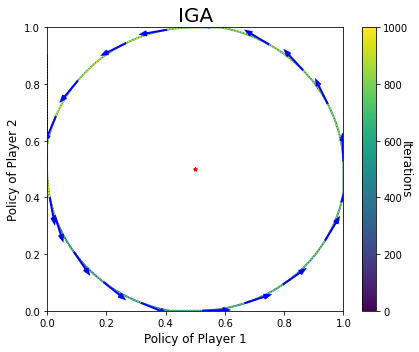

IGA Done


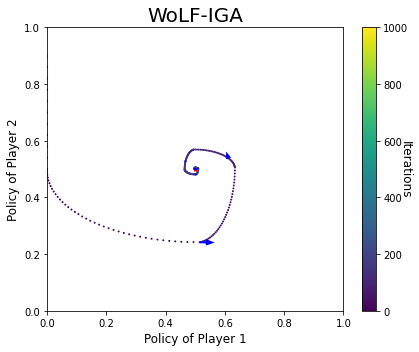

WoLF-IGA Done


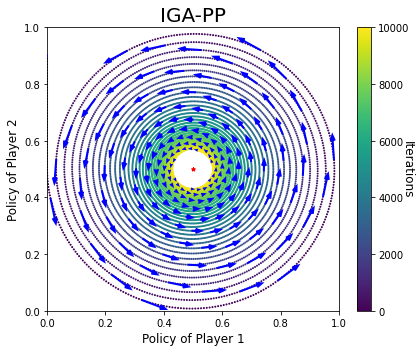

IGA-PP Done


In [ ]:
agents = ['IGA', 'WoLF-IGA', 'IGA-PP']

for agent in agents:

  if agent == 'IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA(pi_alpha,
                                     pi_beta,
                                     payoff_0,
                                     payoff_1,
                                     u_alpha,
                                     u_beta,
                                     iteration=1000, # iteration number
                                     eta=0.01 # step size
                                    )
  elif agent == 'WoLF-IGA':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = WoLF_IGA(pi_alpha,
                                          pi_beta,
                                          payoff_0,
                                          payoff_1,
                                          u_alpha,
                                          u_beta,
                                          pi_alpha_nash=pi_alpha_nash,
                                          pi_beta_nash=pi_beta_nash,
                                          iteration=1000, # iteration number
                                          eta_min=0.01, # min step size
                                          eta_max=0.04 # max step size 
                                         )


  elif agent == 'IGA-PP':
      pi_alpha_history, \
      pi_beta_history, \
      pi_alpha_gradient_history, \
      pi_beta_gradient_history = IGA_PP(pi_alpha,
                                        pi_beta,
                                        payoff_0,
                                        payoff_1,
                                        u_alpha,
                                        u_beta,
                                        iteration=10000, # iteration number
                                        eta=0.01, # step size
                                        gamma=0.01 # step size for policy prediction
                                       )


  plot_dynamics(pi_alpha_history,
                pi_beta_history,
                pi_alpha_gradient_history,
                pi_beta_gradient_history,
                agent)
  print('{} Done'.format(agent))

## Part II: Stochastic Game  (10 points)

### Problem Description

In this part, you are required to implement two agent to play the Stochastic Game, which has non-monotonicity reward and requires exploration to achieve the global optimal. 

There are $3$ intermediate states before arriving at the final state. The game transition and reward matrices are:

![Stochastic Game](https://raw.githubusercontent.com/mlii/mvrl/master/data/sg.png)

Given an initial reward matrix (shown in the middle of the above plot), the choice of joint action leads to different branches. For example, the joint action pair (0, 0) will lead to the left branch, while the joint action pair (1, 1) will lead to the branch on the right. Agents can observe the current step number and branch. Zero rewards lead to the termination state (shown as the red cross).

The optimal policy is to take the top left action pair (0, 0), and finally take the bottom right action pair (1, 1), resulting in a optimal total payoff of $8$.

This game is not easy, because it needs $3$-step exploration to discover the optimal policy, and is hard to deviate from sub-optimal (the right branch). Thus, using a strategic exploration approach is necessary.


In [ ]:
import numpy as np


class StochasticGame():
    def __init__(self, episode_limit=5, good_branches=2, batch_size=None, **kwargs):
        # Define the agents
        self.n_agents = 2

        self.episode_limit = episode_limit

        # Define the internal state
        self.steps = 0

        r_matrix = [[1,1],[1,1]]
        self.payoff_values = [r_matrix for _ in range(self.episode_limit)]
        self.final_step_diff =[[1,1],[1,4]]

        self.branches = 4
        self.branch = 0

        self.n_actions = len(self.payoff_values[0])

        self.good_branches = good_branches

    def reset(self):
        """ Returns initial observations and states"""
        self.steps = 0
        self.branch = 0
        return self.get_obs()

    def step(self, actions):
        """ Returns reward, terminated, info """
        current_branch = 0
        if (actions[0], actions[1]) == (0,0):
            current_branch = 0
        if (actions[0], actions[1]) == (0,1):
            current_branch = 1
        if (actions[0], actions[1]) == (1,0):
            current_branch = 2
        if (actions[0], actions[1]) == (1,1):
            current_branch = 3

        if self.steps == 0:
            self.branch = current_branch

        info = {}

        info["good_payoff"] = 0
        info["branch"] = self.branch

        if self.good_branches == 4:
            reward = 1 if self.branch == current_branch else 0 # Need to follow your branch
        elif self.good_branches == 2:
            reward = 1 if self.branch in [0,3] and self.branch == current_branch else 0
        else:
            raise Exception("Environment not setup to handle {} good branches".format(self.good_branches))

        if self.episode_limit > 1 and self.steps == self.episode_limit - 1 and self.branch == 0:
            info["good_payoff"] = 1
            reward = self.final_step_diff[actions[0]][actions[1]]

        self.steps += 1

        if self.steps < self.episode_limit and reward > 0:
            terminated = False
        else:
            terminated = True

        info["episode_limit"] = False

        # How often the joint-actions are taken
        info["action_00"] = 0
        info["action_01"] = 0
        info["action_10"] = 0
        info["action_11"] = 0
        if (actions[0], actions[1]) == (0, 0):
            info["action_00"] = 1
        if (actions[0], actions[1]) == (0, 1):
            info["action_01"] = 1
        if (actions[0], actions[1]) == (1, 0):
            info["action_10"] = 1
        if (actions[0], actions[1]) == (1, 1):
            info["action_11"] = 1

        return self.get_obs(), [reward] * 2, [terminated] * 2, info

    def get_obs(self):
        """ Returns all agent observations in a list """
        one_hot_step = [0] * (self.episode_limit + 1 + self.branches)
        one_hot_step[self.steps] = 1
        one_hot_step[self.episode_limit + 1 + self.branch] = 1
        return [tuple(one_hot_step) for _ in range(self.n_agents)]

    def get_obs_agent(self, agent_id):
        """ Returns observation for agent_id """
        return self.get_obs()[agent_id]

    def get_obs_size(self):
        """ Returns the shape of the observation """
        return len(self.get_obs_agent(0))

    def get_state(self):
        return self.get_obs_agent(0)

    def get_state_size(self):
        """ Returns the shape of the state"""
        return self.get_obs_size()

    def get_total_actions(self):
        """ Returns the total number of actions an agent could ever take """
        return self.n_actions


### Example: Random Policy

A simple agent using random policy is provided below.

In [ ]:
from collections import defaultdict
from functools import partial
from abc import ABCMeta, abstractmethod
import random

import numpy as np

def sample(pi):
  return np.random.choice(pi.size, size=1, p=pi)[0]

def normalize(pi):
    minprob = np.min(pi)
    if minprob < 0.0:
        pi -= minprob
    pi /= np.sum(pi)

class BaseQAgent:
    def __init__(self, name, action_num=2, phi=0.01, gamma=0.95, episilon=0.1, **kwargs):
        self.name = name
        self.action_num = action_num
        self.episilon = episilon
        self.gamma = gamma
        self.phi = phi
        self.epoch = 0
        self.Q = None
        self.pi = defaultdict(partial(np.random.dirichlet, [1.0] * self.action_num))

    def done(self):
        pass

    def act(self, observation, exploration=False):
        if exploration and random.random() < self.episilon:
            return random.randint(0, self.action_num - 1)
        else:
            return sample(self.pi[observation])

    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        pass

    @abstractmethod
    def update_policy(self, observation, action):
        pass



### TODO: Implement an agent using Q-Learning (3 points)

Q-Learning is a single agent learning algorithm for finding optimal policies in MDPs. The key updating rule is as follwings:

$$
Q(s, a) \leftarrow(1-\phi) Q(s, a)+\phi\left(r+\gamma V\left(s^{\prime}\right)\right)
$$

where,
$$
V(s)=\max\left(\left[Q(s, a)_{a \in \mathcal{A}}\right]\right)
$$

In [ ]:
class QAgent(BaseQAgent):
    def __init__(self, **kwargs):
        super().__init__('QAgent', **kwargs)
        self.Q = defaultdict(partial(np.random.rand, self.action_num))
        self.R = defaultdict(partial(np.zeros, self.action_num))
        self.count_R = defaultdict(partial(np.zeros, self.action_num))

    def done(self):
        self.R.clear()
        self.count_R.clear()

    def update(self, observation, action, reward, next_observation, done):
        self.count_R[observation][action] += 1.0
        self.R[observation][action] += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q = self.Q[observation]
        V = self.val(next_observation)
        
        if done:
            ########### TODO:Implement Q-Learning (Q updating for termination) (1 point) ###########
            self.Q[observation][action] = (1 - self.phi)*Q[action] + self.phi*reward
            ########### END TODO #####################################################
        else:
            ########### TODO:Implement Q-Learning (Q updating) (1 point) ###########
            self.Q[observation][action] = (1 - self.phi)*Q[action] + self.phi*(reward + self.gamma*V)
            ########### END TODO #####################################################
        self.update_policy(observation, action)
        self.epoch += 1

    def val(self, observation):
        ########### TODO:Implement Q-Learning (V) (1 point) ###########
        v = np.amax(self.Q[observation])
        ########### END TODO ##########################################
        return v

    def update_policy(self, observation, action):
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation] / np.sum(self.pi[observation])
  

### Test your Q agents on the Stochastic Game

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from copy import deepcopy

def rollout(env, agents, exploration=True, max_iter=5000, log_episode_interval=100, verbose=False):
  history_reward = []
  state_n = env.reset()
  episode_reward = 0
  episode_count = 0
  recorded_episodes = []
  recorded_episode_reward = []
  for i in range(max_iter):
      actions = np.array([agent.act(state, exploration) for state, agent in zip(state_n, agents)])
      next_state_n, reward_n, done_n, _ = env.step(actions)
      episode_reward += np.mean(reward_n)
      for j, (state, reward, next_state, done, agent) in enumerate(zip(state_n, reward_n, next_state_n, done_n, agents)):
          agent.update(state, actions[j], reward, next_state, done)
      state_n = next_state_n
      if np.all(done_n):
          state_n = env.reset()
          history_reward.append(episode_reward)
          episode_reward = 0
          episode_count += 1
          if (i + 1) %  log_episode_interval == 0:
            recorded_episodes.append(i)
            episodes_mean_reward = np.mean(history_reward)
            recorded_episode_reward.append(episodes_mean_reward)
            history_reward = []
            if verbose:
                print('Iterations {}, Reward {}'.format(i, episodes_mean_reward))
  return recorded_episodes, recorded_episode_reward

In [ ]:
agent_num = 2
action_num = 2

runs = 10
# store data for each run
train_recorded_episodes_log = []
train_recorded_episode_reward_log = []
test_recorded_episode_reward_log = []

for i in range(runs):
  ##################################### INITIALISATION ####################################
  agents = []
  env = StochasticGame()
  for i in range(agent_num):
      agent = QAgent(action_num=action_num)
      agents.append(agent)

  ####################################### TRAINING #######################################
  train_recorded_episodes, train_recorded_episode_reward = rollout(env=env, 
                                                                  agents=agents, 
                                                                  exploration=True, 
                                                                  max_iter=50000)
  # store result for every run
  train_recorded_episodes_log.append(train_recorded_episodes)
  train_recorded_episode_reward_log.append(train_recorded_episode_reward)

  ####################################### TESTING #######################################
  test_recorded_episodes, test_recorded_episode_reward = rollout(env=env, 
                                                               agents=agents, 
                                                               exploration=False, 
                                                               max_iter=10, 
                                                               log_episode_interval=1)
  # store result for every run
  test_recorded_episode_reward_log.append(np.mean(test_recorded_episode_reward))

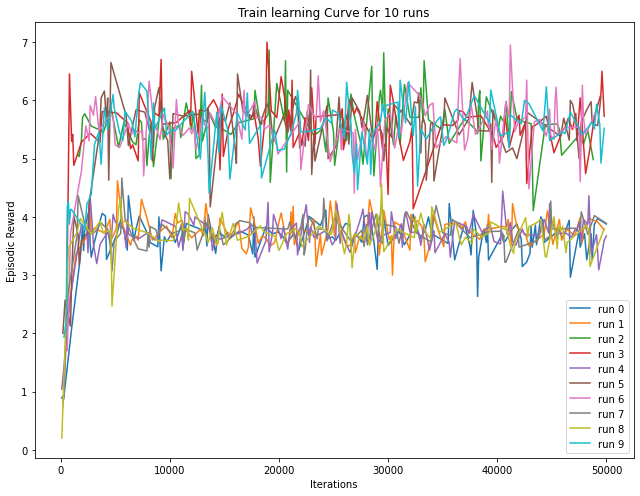

Test reward is (average over 10 runs): 6.5


In [ ]:
####################################### TRAINING #######################################
# different episodes returned every time so each learning curve shown separately
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

for i in range(runs):
  ax.plot(train_recorded_episodes_log[i], train_recorded_episode_reward_log[i], label=f'run {i}')
ax.set_title(f"Train learning Curve for {runs} runs")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Iterations")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

####################################### TESTING #######################################
print(f'Test reward is (average over {runs} runs):', np.mean(test_recorded_episode_reward_log))

### TODO: Implement an Advanced Agent to solve the Stochastic Game (7 points)

Unless you are extremely lucky, the Q-learning agent implemented above is very hard to succeed in the Stochastic Game. In this part, you are required to implement a really cool agent to play the Stochastic Game. 

**Hint: You might want to use a strategic exploration approach.**

Points will be given based on the performance of your algorithm, e.g., if the test reward of your algorithm is 6, you will be given 6/8*9=6.75 points, since the optimal payoff is 8.

In [ ]:
# You can write any code to implement your CoolAgent, please ouput
# action via the act(observation, exploration) method
class CoolAgent(BaseQAgent):
    def __init__(self, **kwargs):
        super().__init__('CoolAgent', **kwargs)
        self.Q = defaultdict(partial(np.random.rand, self.action_num))
        #self.t = 2
        self.R = defaultdict(partial(np.zeros, self.action_num))
        self.count_R = defaultdict(partial(np.zeros, self.action_num))
        #self.c = 1/np.sqrt(2)
        self.T = 1.5

    def done(self):
        self.R.clear()
        self.count_R.clear()
        self.t = 2

    def act(self, observation, exploration):
        if exploration:
          Q = self.Q[observation]
          boltzmann_distr = np.exp(Q/self.T)
          boltzmann_distr = boltzmann_distr/np.sum(boltzmann_distr)
          action = sample(boltzmann_distr)
          return action
        else:
          action = sample(self.pi[observation])
          return action
    @abstractmethod
    def update(self, observation, action, reward, next_observation, done):
        self.count_R[observation][action] += 1.0
        self.R[observation][action] += (reward - self.R[observation][action]) / self.count_R[observation][action]
        Q = self.Q[observation]
        V = self.val(next_observation)
        
        if done:
            self.Q[observation][action] = (1 - self.phi)*Q[action] + self.phi*reward
        else:
            self.Q[observation][action] = (1 - self.phi)*Q[action] + self.phi*(reward + self.gamma*V)
        self.update_policy(observation, action)
        self.epoch += 1
    
    def val(self, observation):
      v = np.amax(self.Q[observation])
      return v

    @abstractmethod
    def update_policy(self, observation, action):
        Q = self.Q[observation]
        self.pi[observation] = (Q == np.max(Q)).astype(np.double)
        self.pi[observation] = self.pi[observation] / np.sum(self.pi[observation])

In [ ]:
# Feel Free to write code here to train and tune your cool agents, 
# and assign the trained agents to cool_agents at the end
# ########################################
# TODO: Your cool agent training code #############
agent_num = 2
action_num = 2

runs = 10
# store data for each run
train_cool_recorded_episodes_log = []
train_cool_recorded_episode_reward_log = []
test_cool_recorded_episode_reward_log = []

for i in range(runs):
  ##################################### INITIALISATION ####################################
  agents = []
  env = StochasticGame()
  for i in range(agent_num):
      agent = CoolAgent(action_num=action_num)
      agents.append(agent)

  ####################################### TRAINING #######################################
  train_cool_recorded_episodes, train_cool_recorded_episode_reward = rollout(env=env, 
                                                                  agents=agents, 
                                                                  exploration=True, 
                                                                  max_iter=70000)
  # store result for every run
  train_cool_recorded_episodes_log.append(train_cool_recorded_episodes)
  train_cool_recorded_episode_reward_log.append(train_cool_recorded_episode_reward)
  
  ####################################### TESTING #######################################
  #########################################
  cool_agents = agents
  # Cool agent evaluation code, please do not change
  cool_env = StochasticGame()
  test_cool_recorded_episodes, test_cool_recorded_episode_reward = rollout(env=cool_env, 
                                                                        agents=cool_agents, 
                                                                        exploration=False, 
                                                                        max_iter=10, 
                                                                        log_episode_interval=1)
  # store result for every run
  test_cool_recorded_episode_reward_log.append(np.mean(test_cool_recorded_episode_reward))

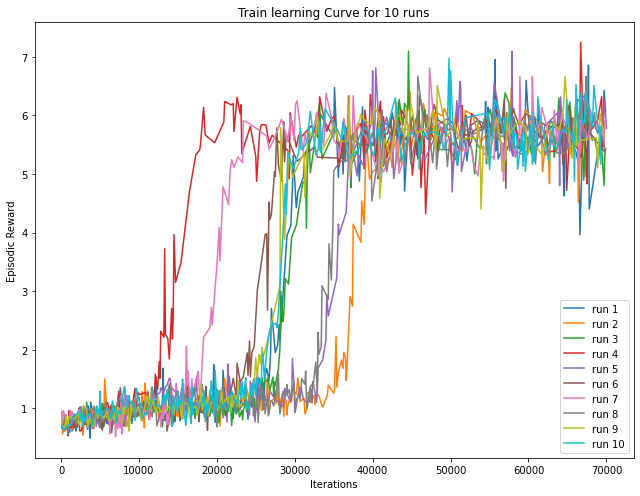

Cool agent's test reward is (average over 10 runs): 8.0


In [ ]:
####################################### TRAINING #######################################
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

for i in range(runs):
  ax.plot(train_cool_recorded_episodes_log[i], train_cool_recorded_episode_reward_log[i], label=f'run {i+1}')
ax.set_title(f"Train learning Curve for {runs} runs")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Iterations")
ax.legend(loc="lower right")
plt.tight_layout()
plt.show()

####################################### TESTING #######################################
print(f'Cool agent\'s test reward is (average over {runs} runs):', np.mean(test_cool_recorded_episode_reward_log))

Few words to analysis the results comparing to the Q Agent, and what you have did to improve the performance. (< 300 words)

What we have done has been to change the exploration strategy to be Boltzmann exploration instead of $\epsilon$-greedy. As we can see, when doing $\epsilon$-greedy the agents sometimes gets stuck in the suboptimal path and they aren't able to learn the optimal policy. With Boltzmann exploration the exploration is done more strategically, since the probability of choosing an action depends on its value, so we will tend to explore areas that seem more promising and therefore have a higher chance of finding the optimal path and learning the optimal policy. This is confirmed by the experimental results. In the test instances the average reward of the agents with Boltzmann exploration is $8$, meaning that the agents have learned the optimal policy. In order to obtain these results, we had to tune the value of the temperature so as to do the right amount of exploration.

...

...




## Part III: Cournot Duopoly (12 points)

Cournot Duopoly is a classic static game that models the imperfect competition in which multiple firms compete in price and production to capture market share.
Since the firms' actions are continuous variables, the game is a continuous action setting.
It is a **nonzero-sum game** (neither team-based nor zero-sum) which represents a challenge for current MARL methods.

Let $a_i\in [-A_i,A_i]$ represents the set of actions for agent $i\in\{1,2\ldots, N\}:=\mathcal{N}$,
where $A_i\in \mathbb{R}_{>0}$.
Each agent $i$'s reward (profit) is 
$$
R_i(a_i,a_{-i})=g_i(a_i,a_{-i})+ w_i(a_i),
$$
where
$
\partial^{2} g_{i} / \partial a_{i}^{2}<0, \partial g_{i} / \partial a_{-i}<0
$,and 
$\partial^{2} g_{i} / \partial a_{i} \partial a_{-i}<0
$.
Agents adopt Markov policies as
$
a_{i} = \pi_i(a_{-i}).
$


#### TODO: Assume $N=2$, prove that policy $\pi_i$ is non-increasing. (5 points)



To make the notation easier, we will show it for $\pi_1$. The proof for $\pi_2$ is identical.

We will do a proof by contradiction. Let's assume there exists $a_2$, $a_2'$, with $a_2 > a_2'$ and $\pi_i(a_2) > pi_1(a_2')$. Since $\pi_1(a_2)$ is the best response of agent $1$ to $a_2$, we have that \begin{align}
  R_1(\pi_1(a_2),a_2) \geq R_1(\pi_1(a_2'),a_2) \Rightarrow g_1(\pi_1(a_2),a_2) + w_1(\pi_1(a_2)) \geq g_1(\pi_1(a_2'),a_2) + w_1(\pi_1(a_2')).
\end{align}

Similarly, $\pi_1(a_2')$ is the best response of agent $1$ to action $a_2'$, so \begin{align}
  R_1(\pi_1(a_2'),a_2') \geq R_1(\pi_1(a_2),a_2') \Rightarrow g_1(\pi_1(a_2'),a_2') + w_1(\pi_1(a_2')) \geq g_1(\pi_1(a_2),a_2') + w_1(\pi_1(a_2)).
\end{align}

Substracting the second inequality to the first we obtain that \begin{align}
g_1(\pi_1(a_2),a_2) - g_1(\pi_1(a_2),a_2') + g_1(\pi_1(a_2'),a_2') - g_1(\pi_1(a_2'),a_2) \geq 0
\end{align}

However, due to our initial hypothesis ($a_2 > a_2'$ with $\pi_1(a_2) > \pi_1(a_2')$) we can write the LHS of the above inequality as \begin{align}
\int_{\pi_1(a_2')}^{\pi_1(a_2)}\int_{a_2'}^{a_2} \frac{\partial^2 g_1}{\partial a_1\partial a_2} da_1da_2
\end{align}

To see this, first note that since by our hypothesis $a_2 > a_2'$ with $\pi_1(a_2) > \pi_1(a_2')$ the above limits of integration are in the correct order. Now, \begin{align}
\int_{\pi_1(a_2')}^{\pi_1(a_2)}\int_{a_2'}^{a_2} \frac{\partial^2 g_1}{\partial a_1\partial a_2} da_1da_2 = \int_{\pi_i(a_2')}^{\pi_1(a_2)}\Big(\frac{\partial g_1(a_1,a_2)}{\partial a_1} - \frac{\partial g_1(a_1,a_2')}{\partial a_1}\Big) = 
\end{align}

\begin{align}
= g_1(\pi_1(a_2), a_2) - g_1(\pi_1(a_2'), a_2) - g_1(\pi_1(a_2), a_2') + g_1(\pi_1(a_2'), a_2')
\end{align}

But we have that $\frac{\partial^2 g_1}{\partial a_1\partial a_2} < 0$, so \begin{align}
\int_{\pi_1(a_2')}^{\pi_1(a_2)}\int_{a_2'}^{a_2} \frac{\partial^2 g_1}{\partial a_1\partial a_2} da_1da_2 < 0 
\end{align}

and we have reached a contradiction. Therefore, it can't be that $a_2 > a_2'$ and $\pi_1(a_2) > \pi_1(a_2')$, so $\pi_1(a_2)$ is a non-increasing function




#### TODO: Set up Cournot Duopoly game. (2 points)



Suppose that 
$$
g_i=a_i(\alpha -\beta\sum_{j\in\mathcal{N}}a_j),
w_i=\gamma a_i.
$$
We choose $A_i=1.0, \forall i\in\mathcal{N}$ and $\alpha=1.5, \beta=1.0, \gamma=-0.5$.

In [ ]:
import numpy as np
import gym

class CournotDuopoly(gym.Env):
    def __init__(self, agent_num=2, action_range=(-1., 1.)):
        self.agent_num = agent_num
        self.action_space = gym.spaces.Box(low=-1.0, high=1.0, shape=(1,))
        self.rewards = np.zeros((self.agent_num,))
        self.t = 0

        alpha = 1.5
        beta = 1.0
        gamma = -0.5

        def payoff_n_cournot(action_n, i):
            """
            Define the payoff function R_i(a_i,a_{-i}).
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: R_i(a_i,a_{-i})
            """
            ########### TODO: Compute R_i(a_i,a_{-i}) (1 point) ###########
            r = action_n[i]*(alpha - beta*np.sum(action_n)) + gamma*action_n[i]
            ########### END TODO ############################
            return r

        def payoff_n_cournot_derivative(action_n, i):
            """
            Define the partial derivative of the payoff function R_i(a_i,a_{-i}) w.r.t. a_i.
            :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
            :param i: agent index
            :return: \partial R_i(a_i,a_{-i}) / \partial a_i
            """
            ########### TODO: Compute \partial R_i(a_i,a_{-i}) / \partial a_i (1 point) ###########
            dr = alpha - beta*np.sum(action_n) - beta*action_n[i] + gamma
            ########### END TODO ############################
            return dr
        
        self.payoff = payoff_n_cournot
        self.payoff_n_derivative = payoff_n_cournot_derivative

    def step(self, action_n):
        """
        Define the environment step function.
        :param action_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
        :return: state_n: (nd.array) a list of all agents' actions, shape is (agent_num,)
        :return: reward_n: (nd.array) a list of all agents' states, shape is (agent_num,)
        :return: done_n: (nd.array) a list of all agents' done status, shape is (agent_num,)
        :return: info: (dict) a dictionary of customized information
        """
        actions = np.array(action_n).reshape((self.agent_num,))
        reward_n = np.zeros((self.agent_num,))
        payoff_derivative_n = np.zeros((self.agent_num,))
        for i in range(self.agent_num):
            payoff_derivative_n[i] = self.payoff_n_derivative(actions, i)
            reward_n[i] = self.payoff(actions, i)
        self.rewards = reward_n
        state_n = np.array(list([[0.0 * i] for i in range(self.agent_num)]))
        info = {'reward_n': reward_n, 'reward_n_derivative': payoff_derivative_n}
        done_n = np.array([True] * self.agent_num)
        self.t += 1
        # print("state_n, reward_n, done_n, info", state_n, reward_n, done_n, info)
        return state_n, reward_n, done_n, info

    def reset(self):
        return np.array(list([[0.0 * i] for i in range(self.agent_num)]))

    def get_rewards(self):
        return self.rewards
    
    def render(self, mode="human", close=False):
        pass

    def terminate(self):
        pass


#### TODO: Implement MADDPG agents to play the Cournot Duopoly Game. (3 points)


Implement the MADDPG algorithm presented in the paper:
[Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments](https://arxiv.org/pdf/1706.02275.pdf).

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import os

class Actor(nn.Module):
    def __init__(self):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(1, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.action_out = nn.Linear(64, 1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        actions = torch.tanh(self.action_out(x))
        return actions


class Critic(nn.Module):
    def __init__(self, obs_shape, action_shape):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(obs_shape + action_shape, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.q_out = nn.Linear(64, 1)

    def forward(self, state, action):
        state = torch.cat(state, dim=1)
        action = torch.cat(action, dim=1)
        x = torch.cat([state, action], dim=1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        q_value = self.q_out(x)
        return q_value


class MADDPG:
    def __init__(self, n_agents, agent_id, obs_shape=1, action_shape=1):
        self.n_agents = n_agents
        self.agent_id = agent_id
        self.action_shape = action_shape
        self.train_step = 0
        self.lr_actor = 1e-4
        self.lr_critic = 1e-3
        self.tau = 0.01
        self.gamma = 0.95

        # create the network
        self.actor_network = Actor()
        self.critic_network = Critic(obs_shape * self.n_agents,
                                     action_shape * self.n_agents)

        # build up the target network
        self.actor_target_network = Actor()
        self.critic_target_network = Critic(obs_shape * self.n_agents,
                                            action_shape * self.n_agents)

        # load the weights into the target networks
        self.actor_target_network.load_state_dict(self.actor_network.state_dict())
        self.critic_target_network.load_state_dict(self.critic_network.state_dict())

        # create the optimizer
        self.actor_optim = torch.optim.Adam(self.actor_network.parameters(), lr=self.lr_actor)
        self.critic_optim = torch.optim.Adam(self.critic_network.parameters(), lr=self.lr_critic)

    # soft update
    def _soft_update_target_network(self):
        for target_param, param in zip(self.actor_target_network.parameters(),
                                       self.actor_network.parameters()):
            ########### TODO: Soft-update target actor network (0.5 point) ###########
            target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)
            ########### END TODO ############################

        for target_param, param in zip(self.critic_target_network.parameters(),
                                       self.critic_network.parameters()):
            ########### TODO: Soft-update target critic network (0.5 point) ###########
            target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)
            ########### END TODO ############################

    # update the network
    def train(self, transitions, other_agents):
        for key in transitions.keys():
            transitions[key] = torch.tensor(transitions[key], dtype=torch.float32)
        r = transitions['r_%d' % self.agent_id]
        o, u, o_next = [], [], []
        for agent_id in range(self.n_agents):
            o.append(transitions['o_%d' % agent_id])
            u.append(transitions['u_%d' % agent_id])
            o_next.append(transitions['o_next_%d' % agent_id])

        # calculate the target Q value function
        u_next = []
        with torch.no_grad():
            index = 0
            for agent_id in range(self.n_agents):
                if agent_id == self.agent_id:
                    u_next.append(self.actor_target_network(o_next[agent_id]))
                else:
                    u_next.append(other_agents[index].actor_target_network(o_next[agent_id]))
                    index += 1
            q_next = self.critic_target_network(o_next, u_next).detach()

            ########### TODO: Calculate the target Q value function (0.5 point) ###########
            target_q = torch.unsqueeze(r, dim = 1) + self.gamma*q_next
            ########### END TODO ############################

        # the q loss
        q_value = self.critic_network(o, u)
        ########### TODO: Calculate the critic loss (0.5 point) ###########
        critic_loss = torch.mean(torch.square(target_q - q_value))
        ########### END TODO ############################

        # the actor loss
        u[self.agent_id] = self.actor_network(o[self.agent_id])
        ########### TODO: Calculate the actor loss (0.5 point) ###########
        actor_loss = -torch.mean(self.critic_network(o,u))
        ########### END TODO ############################
        # update the network
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()

        self._soft_update_target_network()
        self.train_step += 1

    def select_action(self, o, noise_rate, epsilon):
        if np.random.uniform() < epsilon:
            u = np.random.uniform(-1.0, 1.0, self.action_shape)
        else:
            inputs = torch.tensor(o, dtype=torch.float32).unsqueeze(0)
            ########### TODO: Take action based on the actor network (0.5 point) ###########
            u = self.actor_network(inputs) + noise_rate*np.random.normal()
            u = np.clip(u,-1.0,1.0)
            u = np.array(u)
            ########### END TODO ############################
        return u.copy()

    def learn(self, transitions, other_agents):
        self.train(transitions, other_agents)


#### Some useful scripts (please execute).


In [ ]:
import threading

class Buffer:
    def __init__(self, n_agents=5):
        self.n_agents = n_agents
        self.size = int(5e5)
        # memory management
        self.current_size = 0
        # create the buffer to store info
        self.buffer = dict()
        for i in range(self.n_agents):
            self.buffer['o_%d' % i] = np.empty([self.size, 1])
            self.buffer['u_%d' % i] = np.empty([self.size, 1])
            self.buffer['r_%d' % i] = np.empty([self.size])
            self.buffer['o_next_%d' % i] = np.empty([self.size, 1])
        # thread lock
        self.lock = threading.Lock()

    # store the episode
    def store_episode(self, o, u, r, o_next):
        idxs = self._get_storage_idx(inc=1)
        for i in range(self.n_agents):
            with self.lock:
                self.buffer['o_%d' % i][idxs] = o[i]
                self.buffer['u_%d' % i][idxs] = u[i]
                self.buffer['r_%d' % i][idxs] = r[i]
                self.buffer['o_next_%d' % i][idxs] = o_next[i]
    
    # sample the data from the replay buffer
    def sample(self, batch_size):
        temp_buffer = {}
        idx = np.random.randint(0, self.current_size, batch_size)
        for key in self.buffer.keys():
            temp_buffer[key] = self.buffer[key][idx]
        return temp_buffer

    def _get_storage_idx(self, inc=None):
        inc = inc or 1
        if self.current_size+inc <= self.size:
            idx = np.arange(self.current_size, self.current_size+inc)
        elif self.current_size < self.size:
            overflow = inc - (self.size - self.current_size)
            idx_a = np.arange(self.current_size, self.size)
            idx_b = np.random.randint(0, self.current_size, overflow)
            idx = np.concatenate([idx_a, idx_b])
        else:
            idx = np.random.randint(0, self.size, inc)
        self.current_size = min(self.size, self.current_size+inc)
        if inc == 1:
            idx = idx[0]
        return idx

def evaluate(env, agents, agent_num, evaluate_episodes, evaluate_episode_len):
    returns = []
    for episode in range(evaluate_episodes):
        # reset the environment
        s = env.reset()
        rewards_n = np.zeros(agent_num)
        rs = []
        alist = []
        rewards1 = 0
        for time_step in range(evaluate_episode_len):
            actions = []
            with torch.no_grad():
                for agent_id, agent in enumerate(agents):
                    action = agent.select_action(s[agent_id], 0, 0)
                    actions.append(action)
            s_next, r, done, info = env.step(actions)
            if type(info['reward_n']) is list:
                rewards_n += np.sum(info['reward_n'])
            else:
                rewards_n += info['reward_n'].squeeze()

            s = s_next
        returns.append(rewards_n)
    s = env.reset()
    mean_return = sum(returns) / evaluate_episodes

    return mean_return


#### Test your implemented MADDPG agent in the Cournot Duopoly Game.


  0%|          | 88/20000 [00:22<59:30:07, 10.76s/it]

[  3.81661419  -6.03948828  12.62979705 -17.01584737 -15.02434448]


  5%|▌         | 1004/20000 [01:11<11:52:51,  2.25s/it]

[-0.25012213 -0.23702987 -0.31209395 -0.19642278 -0.2221579 ]


 10%|█         | 2004/20000 [02:08<7:27:57,  1.49s/it] 

[1.7638479  1.75449875 2.02823114 1.38700584 1.52419513]


 15%|█▌        | 3004/20000 [03:07<7:05:31,  1.50s/it] 

[1.43950425 1.40270159 1.59986782 1.20062741 1.293146  ]


 20%|██        | 4004/20000 [04:06<19:44:38,  4.44s/it]

[2.10110195 2.12581791 2.37016562 1.8407731  1.90025245]


 25%|██▌       | 5004/20000 [05:05<18:45:08,  4.50s/it]

[1.71023563 1.66719648 1.82497564 1.51566953 1.56943803]


 30%|███       | 6004/20000 [06:05<5:54:17,  1.52s/it]

[1.48130601 1.45851885 1.58084562 1.33156666 1.36006918]


 35%|███▌      | 7004/20000 [07:06<5:38:33,  1.56s/it]

[1.91274581 1.8980371  2.09129384 1.69579874 1.73425226]


 40%|████      | 8004/20000 [08:07<5:17:07,  1.59s/it]

[1.70152775 1.7299577  1.85675499 1.5089408  1.55325836]


 45%|████▌     | 9004/20000 [09:09<14:13:11,  4.66s/it]

[1.67148088 1.65744409 1.75816383 1.49545442 1.56249837]


 50%|█████     | 10004/20000 [10:11<12:53:19,  4.64s/it]

[2.07187451 2.04254694 2.18340902 1.89739671 1.92134845]


 55%|█████▌    | 11004/20000 [11:10<3:49:04,  1.53s/it]

[2.28258864 2.26174486 2.4013473  2.05013462 2.07899481]


 60%|██████    | 12003/20000 [12:10<10:00:07,  4.50s/it]

[1.95453967 1.86854649 2.03063693 1.76211873 1.79335408]


 65%|██████▌   | 13004/20000 [13:12<4:32:06,  2.33s/it]

[2.61023448 2.51091369 2.76291542 2.31687395 2.35618066]


 70%|███████   | 14004/20000 [14:12<3:44:36,  2.25s/it]

[2.53161232 2.44473943 2.64824063 2.27795654 2.31340653]


 75%|███████▌  | 15004/20000 [15:11<2:06:44,  1.52s/it]

[2.08152422 2.03936339 2.16312854 1.92034965 1.93372102]


 80%|████████  | 16004/20000 [16:10<4:50:34,  4.36s/it]

[1.54972121 1.57280463 1.62471756 1.49434486 1.48851787]


 85%|████████▌ | 17004/20000 [17:07<1:12:57,  1.46s/it]

[1.1310226  1.1153394  1.16367294 1.0652288  1.05889058]


 90%|█████████ | 18004/20000 [18:04<2:22:56,  4.30s/it]

[1.78897452 1.83088489 1.88742874 1.69482102 1.70887789]


 95%|█████████▌| 19004/20000 [19:02<36:06,  2.18s/it]

[2.33679211 2.30221365 2.50519983 2.15813176 2.20342836]


100%|██████████| 20000/20000 [19:38<00:00, 16.96it/s]


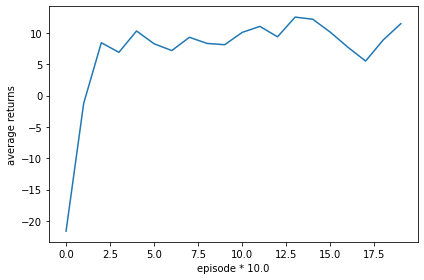

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

noise = 0.1
epsilon = 0.1
episode_limit = 100
n_agents = 5
batch_size = 256
evaluate_rate = 1000
time_steps = 20000
evaluate_episode_len = 100
evaluate_episodes = 100
env = CournotDuopoly(agent_num=n_agents)
agents = [MADDPG(n_agents, i, obs_shape=1, action_shape=1) for 
          i in range(n_agents)]
buffer = Buffer(n_agents=n_agents)

returns = []
done = None
mean_return_eval = 0.
for time_step in tqdm(range(time_steps)):
    if time_step % episode_limit == 0 or np.all(done):
        s = env.reset()
    u = []
    actions = []
    with torch.no_grad():
        for agent_id, agent in enumerate(agents):
            action = agent.select_action(s[agent_id], noise, epsilon)
            u.append(action)
            actions.append(action)

    s_next, r, done, info = env.step(actions)
    buffer.store_episode(s[:n_agents], u,
                         r[:n_agents], s_next[:n_agents])

    s = s_next

    if buffer.current_size >= batch_size:
        transitions = buffer.sample(batch_size)
        for agent in agents:
            other_agents = agents.copy()
            other_agents.remove(agent)
            agent.learn(transitions, other_agents)

    if time_step == 0 or time_step % evaluate_rate == 0:
        mean_return_eval = evaluate(env, agents, n_agents,
                                    evaluate_episodes, evaluate_episode_len)
        returns.append(mean_return_eval)
        print(mean_return_eval)
plt.figure()
plt.plot(range(len(returns)), np.array(returns).sum(-1))
plt.xlabel('episode * ' + str(evaluate_rate / episode_limit))
plt.ylabel('average returns')
plt.tight_layout()
plt.show()

#### TODO: Analyze the performance of your implemented MADDPG algorithm. Describe the reason if it's not playing well.(2 points)

*Hint: Cournot Monopoly is a nonzero-sum game.*

Your answer here.

## Part IV: Deep Multi-Agent Reinforcement Learning (18 points)

For this part of the coursework, you will implement your choice of any deep reinforcement learning algorithms (e.g., DQN, DRQN, or PPO) in a multi-agent setting and get to see it work on the `Switch-n` environment from ma-gym. Please read [the wiki of ma-gym](https://github.com/koulanurag/ma-gym/wiki/) first.

### Environment Example
#### Switch2-v0
![Switch-2](https://raw.githubusercontent.com/koulanurag/ma-gym/master/static/gif/Switch2-v0.gif)
#### Switch4-v0
![Switch-4](https://raw.githubusercontent.com/koulanurag/ma-gym/master/static/gif/Switch4-v0.gif)

`Switch-n` is a grid world environment having `n agents` where each agent wants to move their corresponding home location (marked in boxes outlined in same colors).
Each agent receives only it's local position coordinates. The challenging part of the game is to pass through the narrow corridor through which only one agent can pass at a time. They need to coordinate to not block the pathway for the other. A reward of +5 is given to each agent for reaching their home cell. The episode ends when both agents has reached their home state or for a maximum of 100 steps in environment.

Action Space: `0: Down, 1: Left, 2: Up , 3: Right, 4: Noop`

Agent Observation : `Agent Coordinate + Steps in env.`

Best Score: `NA`

### Download Requirements and Set the Environment
The following command will download the required scripts and set up the environment. 

In [ ]:
!rm -rf /content/ma-gym  
!git clone https://github.com/koulanurag/ma-gym.git 
%cd /content/ma-gym 
!pip install -q -e . 
!apt-get install -y xvfb python-opengl x11-utils > /dev/null 2>&1
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install x11-utils
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

Cloning into 'ma-gym'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 981 (delta 16), reused 32 (delta 8), pack-reused 931
Receiving objects: 100% (981/981), 3.72 MiB | 16.48 MiB/s, done.
Resolving deltas: 100% (479/479), done.
/content/ma-gym
Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (54.2.0)


In [ ]:
%matplotlib inline
import gym
import ma_gym
from ma_gym.wrappers import Monitor
import matplotlib.pyplot as plt
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay


from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

#### Example of playing Switch2-v0 Using Random Policy

In [ ]:
env = wrap_env(gym.make("Switch2-v0")) # Use "Switch4-v0" for the Switch-4 game
done_n = [False for _ in range(env.n_agents)]
ep_reward = 0

obs_n = env.reset()
while not all(done_n):
    obs_n, reward_n, done_n, info = env.step(env.action_space.sample())
    ep_reward += sum(reward_n)
    env.render()
env.close()
# To improve the training efficiency, render() is not necessary during the training.
# We provide the render and video code here just want to demonstrate how to debugging and analysis.
#show_video()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


### TODO: Implement a Deep MARL Agent to Play Switch2-v0 (12 points)
Implement your own choice of any deep MARL algorithms to play the Switch2-v0 game.

**Requirements**

*   Implement your own algorithms, rather than a simple `import` from any other existing algorithm frameworks.
* TensorFlow 2.0+ or PyTorch 1.4+ are recommended.
*   Your algorithm has to be Multi-Agent, i.e., policy input should be the observation/ state for each corresponding agent, not for all agents.

**Required contents**

*   All your codes
*   Learning Curve (reward with respect to training iterations/ episodes)
*   Description of your code and performance analysis (no more than 500 words)



#### Code for Playing Switch2-v0


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from collections import deque
import random

In [ ]:
class DQN(nn.Module):

  def __init__(self):
    super(DQN, self).__init__()
    #The input is the observation coordinates and timestep
    self.fully_conn1 = nn.Linear(3, 64)
    self.fully_conn2 = nn.Linear(64, 32)
    self.fully_conn3 = nn.Linear(32, 64)
    #Layers for dueling network
    self.V = nn.Linear(64,1)
    self.A = nn.Linear(64,5)

  def forward(self, x):
    x = F.relu(self.fully_conn1(x))
    x = F.relu(self.fully_conn2(x))
    x = F.relu(self.fully_conn3(x))

    V = self.V(x)
    A = self.A(x)

    Q = V + (A - A.mean())

    return Q

In [ ]:
class DQN_Decomp_2:

  def __init__(self, tau = 0.01, lr_agent = 1e-4, gamma = 0.95):
    self.tau = tau
    self.lr_agent = lr_agent
    self.gamma = gamma


    #Create the agents nn

    self.agent_1 = DQN()
    self.target_agent_1 = DQN()

    self.agent_2 = DQN()
    self.target_agent_2 = DQN()

    #Load the parameters of the actor network in the target network
   # self.target_central.load_state_dict(self.central.state_dict())
    self.target_agent_1.load_state_dict(self.agent_1.state_dict())
    self.target_agent_2.load_state_dict(self.agent_2.state_dict())

    #Define the optimizer
    self.agent_optimizer = torch.optim.Adam(list(self.agent_1.parameters()) + list(self.agent_2.parameters()),\
                                            lr=self.lr_agent)

  def update_target_network(self):

    #Update agent 1 parameters
    for target_param, param in zip(self.target_agent_1.parameters(),
                                       self.agent_1.parameters()):
      target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)

    #Update agent 2 parameters
    for target_param, param in zip(self.target_agent_2.parameters(),
                                       self.agent_2.parameters()):
      target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)


  def training(self, buffer, batch_size, future_steps):

    obs, action, reward, next_obs, done = buffer.sample(batch_size)

    obs_1 = obs[:,:3]
    obs_2 = obs[:,3:6]

    action_1 = action[:,0].unsqueeze(1)
    action_2 = action[:,1].unsqueeze(1)

    next_obs_1 = next_obs[:,:3]
    next_obs_2 = next_obs[:,3:6]

    outputs_1 = self.agent_1.forward(obs_1)
    outputs_2 = self.agent_2.forward(obs_2)

    #We use value decomposition, so we add the Q values of each agent
    q_agent = (outputs_1.gather(1, action_1) + outputs_2.gather(1, action_2)).squeeze()

    next_outputs_1 = self.target_agent_1.forward(next_obs_1).detach()
    next_outputs_1 = torch.max(next_outputs_1, 1).values
    next_outputs_2 = self.target_agent_2.forward(next_obs_2).detach()
    next_outputs_2 = torch.max(next_outputs_2, 1).values

    #We use value decomposition, so we add the targets of each agent
    q_target = (next_outputs_1 + next_outputs_2).detach()
   
    q_target = reward + (self.gamma**future_steps)*(1 - done)*q_target

    q_target.squeeze()

    loss = torch.mean(torch.square(q_agent - q_target))

    self.agent_optimizer.zero_grad()
    loss.backward()
    self.agent_optimizer.step()

    self.update_target_network()



  def select_action_eps_greedy(self, state_1, state_2, epsilon):
  #Performs an epsilon greedy action selection 
    coin_1 = np.random.rand()
    coin_2 = np.random.rand()
    if coin_1 < epsilon:
      #Choose action uniformly at random
      #Remember, there are 5 actions per agent
      action_1 = torch.tensor(np.random.choice(5, size=1)[0])
    else:
      #Choose the greedy action (ties broken randomly)
      q_s = self.agent_1.forward(state_1)
      action_1 = torch.tensor(np.random.choice(np.where(q_s == torch.max(q_s))[0]))
    #Same for other agent
    if coin_2 < epsilon:
      action_2 = torch.tensor(np.random.choice(5, size=1)[0])
    else:
      q_s = self.agent_2.forward(state_2)
      action_2 = torch.tensor(np.random.choice(np.where(q_s == torch.max(q_s))[0]))
    return [action_1, action_2]

Create buffers and functions to load data

In [ ]:
class buffer:

  def __init__(self, memory, steps, gamma):
    self.memory = memory
    self.steps = steps
    self.gamma = gamma
    self.global_buffer = deque(maxlen = self.memory)
    self.n_step_buffer = deque(maxlen = self.steps)

  def store(self, observation, action, reward, next_observation, done):
    #First, we store the new transition
    self.n_step_buffer.append([observation, action, reward, next_observation, done])
    #Then, we check if the multi step buffer has the right size
    if len(self.n_step_buffer) == self.steps:
      #If it does, we grab the initial state and action
      #and build a recurrence to obtain the cumulative reward and the
      #final state, taking into account that we don't want to cross over episodes
      initial_observation = self.n_step_buffer[0][0]
      initial_action = self.n_step_buffer[0][1]
      #Now, to bould the final observations, return and done state
      reward = self.n_step_buffer[-1][2]
      next_observation = self.n_step_buffer[-1][3]
      done = self.n_step_buffer[-1][4]
      for i in range(len(self.n_step_buffer) - 1):
        reward = gamma*reward*(1 - self.n_step_buffer[-1-i - 1][4]) + self.n_step_buffer[-1-i - 1][2]
        if self.n_step_buffer[-1-i - 1][4]:
          next_observation = self.n_step_buffer[-1-i - 1][3]
          done = self.n_step_buffer[-1-i - 1][4]
      self.global_buffer.append([initial_observation, initial_action, reward, next_observation, done])
  
  def sample(self, batch_size):
    transitions = random.sample(self.global_buffer, batch_size)
    observation, action, reward, next_observation, done = zip(* transitions)
    observation = torch.FloatTensor(observation)
    action = torch.LongTensor(action)
    reward = torch.FloatTensor(reward)
    next_observation = torch.FloatTensor(next_observation)
    done = torch.FloatTensor(done)
    return observation, action, reward, next_observation,  done

In [ ]:
n_episodes = 9000
batch_size = 32
memory = 10000
future_steps = 10
gamma = 0.95

initial_epsilon = 1
final_epsilon = 1e-6
decay_rate = 0.999
epsilon = initial_epsilon

buffer_transitions = buffer(memory, future_steps, gamma)

vd_net = DQN_Decomp_2()
episode_reward_training = []
n_agents_destination_training = []
for i in range(n_episodes):
  print(i)
  obs_n = env.reset()
  iter = 0
  ep_reward = 0
  done_n = [False, False]
  epsilon = max(final_epsilon, epsilon*decay_rate)
  while not all(done_n):
    last_done = list(done_n)
    action_1, action_2 = vd_net.select_action_eps_greedy(torch.cat((torch.FloatTensor(obs_n[0]),torch.tensor([iter + 0.0]))),\
                                              torch.cat((torch.FloatTensor(obs_n[1]),torch.tensor([iter + 0.0]))), epsilon)
    
    next_obs_n, reward_n, done_n, info = env.step([action_1,action_2])
    ep_reward += sum(reward_n)
    buffer_transitions.store(obs_n[0] + [iter] + obs_n[1] + [iter], [action_1, action_2], reward_n[0] + reward_n[1],\
              next_obs_n[0] + [iter + 1] + next_obs_n[1] + [iter + 1], done_n[0]*done_n[1])
    obs_n = next_obs_n
    iter += 1
    #Leave enough time to fill the buffer before training
    if i > 0:
      vd_net.training(buffer_transitions, batch_size, future_steps)
  episode_reward_training.append(ep_reward)
  if iter < 50:
    n_agents_destination_training.append(2)
  else:
    n_agents_destination_training.append(sum(last_done))
    

#### Plot the Learning Curve

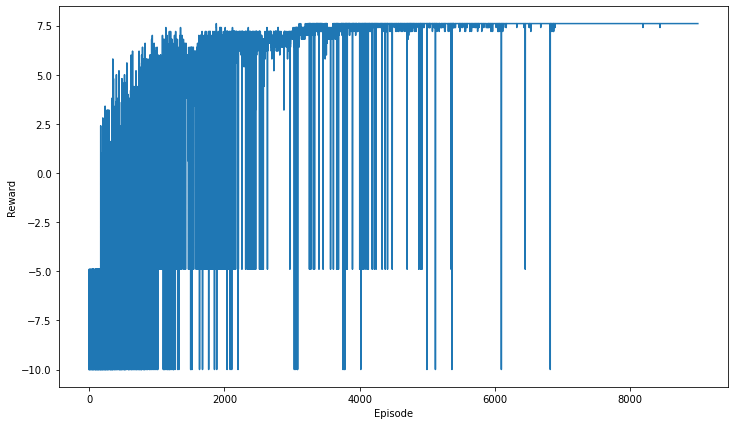

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.plot(episode_reward_training)
plt.show()

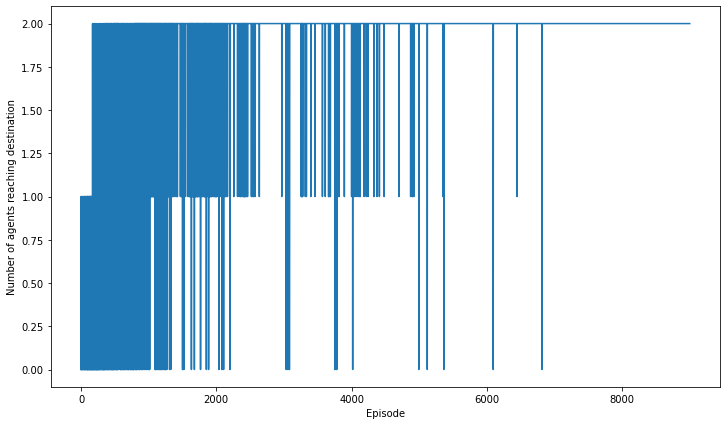

In [ ]:
plt.figure(figsize = (12,7))
plt.xlabel('Episode')
plt.ylabel('Number of agents reaching destination')
plt.plot(n_agents_destination_training)
plt.show()

We now present the performance of the learned greedy policy in more detail

In [ ]:
env = wrap_env(gym.make("Switch2-v0"))
obs_n = env.reset()
iteration = 0
done_n = [False, False]
test_reward = []
while not all(done_n):
    state_agent_1 = torch.cat((torch.FloatTensor(obs_n[0]),torch.tensor([iteration + 0.0])))
    state_agent_2 = torch.cat((torch.FloatTensor(obs_n[1]),torch.tensor([iteration + 0.0])))
    action_agent_1, action_agent_2 = vd_net.select_action_eps_greedy(state_agent_1, state_agent_2, epsilon=-1)
    obs_n, reward_n, done_n, info = env.step([action_agent_1,action_agent_2])
    test_reward.append(sum(reward_n))
    iteration += 1
    #env.render()

env.close()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


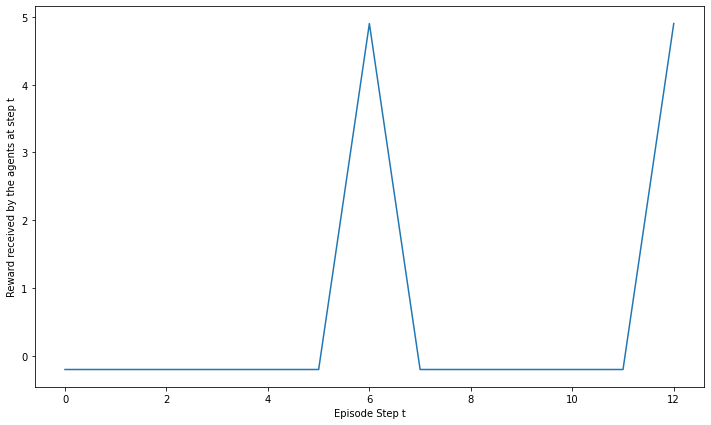

In [ ]:
plt.figure(figsize = (12,7))
plt.xlabel('Episode Step t')
plt.ylabel('Reward received by the agents at step t')
plt.plot(test_reward)
plt.show()

#### Analysis on performance

We implement a value decomposition network based on https://arxiv.org/pdf/1706.05296.pdf. We started by implementing for each agent a standard DQN that was trained via experience replay and that used a target network that was updated through soft updates to improve the stability of training. By doing this and using $\epsilon$-greedy behaviour policies (with an exponentially decaying $\epsilon$) we obtained that one agent would reach its goal quite efficiently and the other would not move. Clearly getting an agent to reach its goal is a first step towards the optimal policy of the two agents. However, with the current setup we found it impossible to get the second agent to reach its goal as well. We then included the use of multi-step returns. The number of steps used in the multi-step return ($20$) was deliberately chosen to be quite bigger than the length of the path an agent should follow to reach its goal. By doing this we hoped that the agents could learn better from the few cases in which both of them reach the goal. This way when one agent learned to consistently reach its goal the other would have a value function that would encourage it to move in the direction of its goal and therefore it will be more likely to see episodes in which both of them reach their goals. One agent would reach its goal through the most efficient path and the second one would follow a more convoluted path, that path would progressively be refined. We observed that by doing this at convergence we still had one agent reaching its goal optimally but now the second agent started moving after the first one had reached its goal. However, the second agent would not reach its goal reliably at convergence, and the path that it followed, although it tried to go through the corridor, was quite erratic. Perhaps we could have achieved better performance by trying to fine tune the hyperparrameters (rate of decay of $\epsilon$ or number of steps used in the multi-step return), but due to its simplicity we chose to use a value decomposition network to enhance the cooperation between the agents (we also changed the neural networks used by our agents to estimate the state action value functions to Dueling Networks, to further enchance the robustness of our algorithm). After doing this, we observed that we consistently achieved convergence to the optimal policy. Indeed, the plots above show how both agents at convergence reach their goal following the optimal paths

### TODO: Implement a Deep MARL Agent to Play Switch4-v0 (6 points)
Implement your own choice of any deep MARL algorithms to play the Switch4-v0 game.

**Requirements**

Same reuqiremnts as Switch2-v0 game. You can put emphasis on what differences between Switch2-v0 and Switch4-v0 and what improvements you have done.



#### Code for Playing Switch4-v0


In [ ]:
env = wrap_env(gym.make("Switch4-v0")) # Use "Switch4-v0" for the Switch-4 game
done_n = [False for _ in range(env.n_agents)]
ep_reward = 0

obs_n = env.reset()
while not all(done_n):
    obs_n, reward_n, done_n, info = env.step(env.action_space.sample())
    ep_reward += sum(reward_n)
    env.render()
env.close()
# To improve the training efficiency, render() is not necessary during the training.
# We provide the render and video code here just want to demonstrate how to debugging and analysis.
#show_video()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
class DQN_Decomp_4:
  #The same as for DQN_Decomp_2, we have only repeated the relevant parts of the
  #code for the new agents
  def __init__(self, tau = 0.01, lr_agent = 1e-4, gamma = 0.95):
    self.tau = tau
    self.lr_agent = lr_agent
    self.gamma = gamma


    #Create the agents nn

    self.agent_1 = DQN()
    self.target_agent_1 = DQN()

    self.agent_2 = DQN()
    self.target_agent_2 = DQN()

    self.agent_3 = DQN()
    self.target_agent_3 = DQN()

    self.agent_4 = DQN()
    self.target_agent_4 = DQN()

    #Load the parameters of the actor network in the target network
   # self.target_central.load_state_dict(self.central.state_dict())
    self.target_agent_1.load_state_dict(self.agent_1.state_dict())
    self.target_agent_2.load_state_dict(self.agent_2.state_dict())
    self.target_agent_3.load_state_dict(self.agent_3.state_dict())
    self.target_agent_4.load_state_dict(self.agent_4.state_dict())

    #Define the optimizer
    self.agent_optimizer = torch.optim.Adam(list(self.agent_1.parameters()) + list(self.agent_2.parameters()) + \
                                            list(self.agent_3.parameters()) + list(self.agent_4.parameters()),\
                                            lr=self.lr_agent)

  def update_target_network(self):

    #Update agents parameters
    for target_param, param in zip(self.target_agent_1.parameters(),
                                       self.agent_1.parameters()):
      target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)

    for target_param, param in zip(self.target_agent_2.parameters(),
                                       self.agent_2.parameters()):
      target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)

    for target_param, param in zip(self.target_agent_3.parameters(),
                                  self.agent_3.parameters()):
      target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)

    for target_param, param in zip(self.target_agent_4.parameters(),
                                       self.agent_4.parameters()):
      target_param.data.copy_(self.tau*param.data + (1 - self.tau)*target_param.data)


  def training(self, buffer, batch_size, future_steps):

    obs, action, reward, next_obs, done = buffer.sample(batch_size)

    obs_1 = obs[:,:3]
    obs_2 = obs[:,3:6]
    obs_3 = obs[:,6:9]
    obs_4 = obs[:,9:12]

    action_1 = action[:,0].unsqueeze(1)
    action_2 = action[:,1].unsqueeze(1)
    action_3 = action[:,2].unsqueeze(1)
    action_4 = action[:,3].unsqueeze(1)

    next_obs_1 = next_obs[:,:3]
    next_obs_2 = next_obs[:,3:6]
    next_obs_3 = next_obs[:,6:9]
    next_obs_4 = next_obs[:,9:12]


    outputs_1 = self.agent_1.forward(obs_1)
    outputs_2 = self.agent_2.forward(obs_2)
    outputs_3 = self.agent_3.forward(obs_3)
    outputs_4 = self.agent_4.forward(obs_4)

    q_agent = (outputs_1.gather(1, action_1) + outputs_2.gather(1, action_2) + \
               outputs_3.gather(1, action_3) + outputs_4.gather(1, action_4)).squeeze()

    next_outputs_1 = self.target_agent_1.forward(next_obs_1).detach()
    next_outputs_1 = torch.max(next_outputs_1, 1).values
    next_outputs_2 = self.target_agent_2.forward(next_obs_2).detach()
    next_outputs_2 = torch.max(next_outputs_2, 1).values
    next_outputs_3 = self.target_agent_3.forward(next_obs_3).detach()
    next_outputs_3 = torch.max(next_outputs_3, 1).values
    next_outputs_4 = self.target_agent_4.forward(next_obs_4).detach()
    next_outputs_4 = torch.max(next_outputs_4, 1).values

    q_target = (next_outputs_1 + next_outputs_2 + next_outputs_3 + next_outputs_4).detach()

    
    q_target = reward + (self.gamma**future_steps)*(1 - done)*q_target

    q_target.squeeze()

    loss = torch.mean(torch.square(q_agent - q_target))

    self.agent_optimizer.zero_grad()
    loss.backward()
    self.agent_optimizer.step()

    self.update_target_network()



  def select_action_eps_greedy(self, state_1, state_2,state_3, state_4, epsilon):
  #Performs an epsilon greedy action selection during training
  #Otherwise, performs always the greedy action
    coin_1 = np.random.rand()
    coin_2 = np.random.rand()
    coin_3 = np.random.rand()
    coin_4 = np.random.rand()
    if coin_1 < epsilon:
      action_1 = torch.tensor(np.random.choice(5, size=1)[0])
    else:
      q_s = self.agent_1.forward(state_1)
      action_1 = torch.tensor(np.random.choice(np.where(q_s == torch.max(q_s))[0]))
    if coin_2 < epsilon:
      action_2 = torch.tensor(np.random.choice(5, size=1)[0])
    else:
      q_s = self.agent_2.forward(state_2)
      action_2 = torch.tensor(np.random.choice(np.where(q_s == torch.max(q_s))[0]))
    if coin_3 < epsilon:
      action_3 = torch.tensor(np.random.choice(5, size=1)[0])
    else:
      q_s = self.agent_3.forward(state_3)
      action_3 = torch.tensor(np.random.choice(np.where(q_s == torch.max(q_s))[0]))
    if coin_4 < epsilon:
      action_4 = torch.tensor(np.random.choice(5, size=1)[0])
    else:
      q_s = self.agent_4.forward(state_4)
      action_4 = torch.tensor(np.random.choice(np.where(q_s == torch.max(q_s))[0]))

    return [action_1,action_2,action_3,action_4]


In [ ]:
n_episodes = 15000
batch_size = 32
memory = 10000
train_steps = 10
future_steps = 20
gamma = 0.95

initial_epsilon = 1
final_epsilon = 1e-9
decay_rate = 0.999
epsilon = initial_epsilon

buffer_transitions = buffer(memory, future_steps, gamma)

vd_net_4 = DQN_Decomp_4()
n_agents_destination_training = []
episode_reward_training = []
for i in range(n_episodes):
  print(i)
  obs_n = env.reset()
  iter = 0
  ep_reward = 0
  done_n = [False, False, False, False]
  epsilon = max(final_epsilon, epsilon*decay_rate)
  while not all(done_n):
    last_done = list(done_n)
    action_1, action_2, action_3, action_4 = vd_net_4.select_action_eps_greedy(torch.cat((torch.FloatTensor(obs_n[0]),torch.tensor([iter + 0.0]))),\
                                              torch.cat((torch.FloatTensor(obs_n[1]),torch.tensor([iter + 0.0]))),\
                                               torch.cat((torch.FloatTensor(obs_n[2]),torch.tensor([iter + 0.0]))),\
                                               torch.cat((torch.FloatTensor(obs_n[3]),torch.tensor([iter + 0.0]))), epsilon)
    
    next_obs_n, reward_n, done_n, info = env.step([action_1,action_2, action_3, action_4])
    ep_reward += sum(reward_n)
    buffer_transitions.store(obs_n[0] + [iter] + obs_n[1] + [iter] + obs_n[2] + [iter] + obs_n[3] + [iter], [action_1, action_2, action_3, action_4], \
                 reward_n[0] + reward_n[1] + reward_n[2] + reward_n[3],\
                 next_obs_n[0] + [iter + 1] + next_obs_n[1] + [iter + 1] + next_obs_n[2] + [iter + 1] + next_obs_n[3] + [iter + 1],\
                 done_n[0]*done_n[1]*done_n[2]*done_n[3])
    obs_n = next_obs_n
    iter += 1
    if i > 0:
      vd_net_4.training(buffer_transitions, batch_size, future_steps)
  episode_reward_training.append(ep_reward)
  if iter < 50:
    n_agents_destination_training.append(4)
  else:
    n_agents_destination_training.append(sum(last_done))

#### Plot the Learning Curve

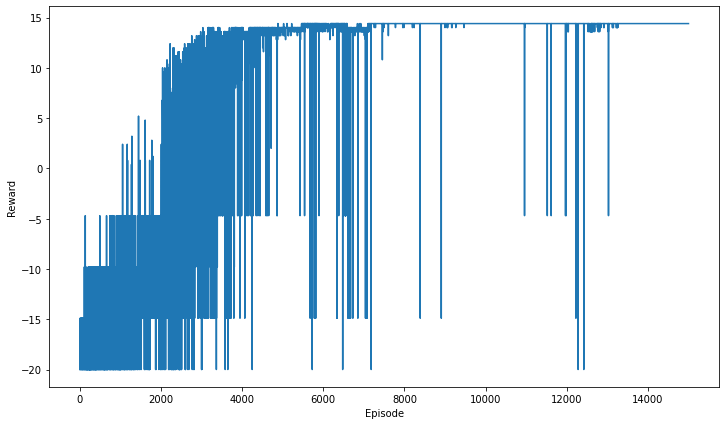

In [ ]:
plt.figure(figsize = (12,7))
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.plot(episode_reward_training)
plt.show()

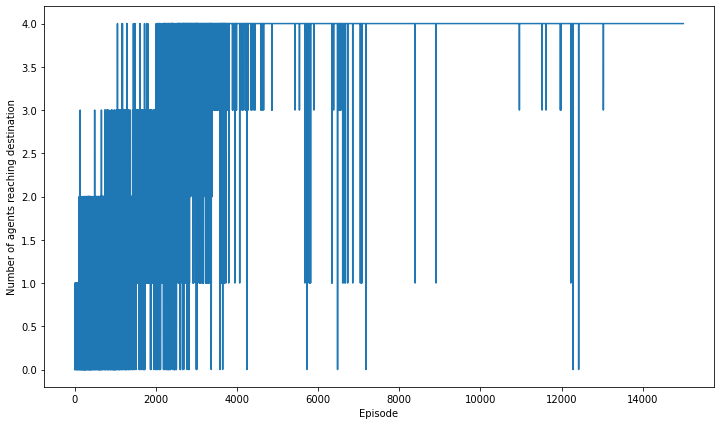

In [ ]:
plt.figure(figsize = (12,7))
plt.xlabel('Episode')
plt.ylabel('Number of agents reaching destination')
plt.plot(n_agents_destination_training)
plt.show()

We now present the performance of the learned greedy policy in more detail

In [18]:
env = wrap_env(gym.make("Switch4-v0"))
obs_n = env.reset()
iteration = 0
done_n = [False, False, False, False]
test_reward = []
while not all(done_n):
    state_agent_1 = torch.cat((torch.FloatTensor(obs_n[0]),torch.tensor([iteration + 0.0])))
    state_agent_2 = torch.cat((torch.FloatTensor(obs_n[1]),torch.tensor([iteration + 0.0])))
    state_agent_3 = torch.cat((torch.FloatTensor(obs_n[2]),torch.tensor([iteration + 0.0])))
    state_agent_4 = torch.cat((torch.FloatTensor(obs_n[3]),torch.tensor([iteration + 0.0])))
    action_agent_1, action_agent_2, action_agent_3, action_agent_4 = vd_net_4.select_action_eps_greedy(state_agent_1, state_agent_2,\
                                                                                                      state_agent_3, state_agent_4, epsilon=-1)
    #print(action_agent_1)
    obs_n, reward_n, done_n, info = env.step([action_agent_1,action_agent_2, action_agent_3, action_agent_4])
    #print(done_n)
    test_reward.append(sum(reward_n))
    iteration += 1
    #env.render()

env.close()

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


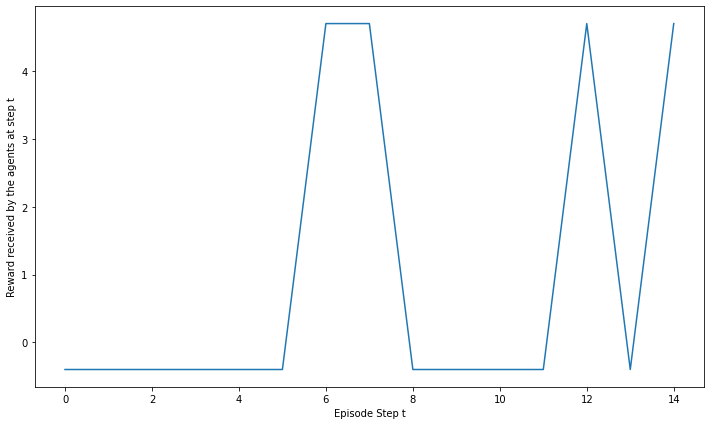

In [ ]:
plt.figure(figsize = (12,7))
plt.xlabel('Episode Step t')
plt.ylabel('Reward received by the agents at step t')
plt.plot(test_reward)
plt.show()

#### Analysis on Performance

After implementing a value decomposition network for the previous part, we thought that our model should also be able to achieve optimal performance in Switch v4. The only important changes we made were to increase the number of episodes and change the $\epsilon$ decay rate from $0.99$ to $0.999$ (now $\epsilon$ will decay more slowly). We did this because we wanted to make sure that the agents were provided with enough training examples to converge to the optimal policy, and we didn't want to risk achieving the optimal performance at convergence by greedifying to quickly and ending in a suboptimal local optima. Our results show that indeed we converge to the optimal policy.

One aspect that we found quite interesting about this algorithm was its robustness. Initially we were training in an environment in which the agents could run for $100$ steps. We then changed this to $50$ steps and we still obtained optimal performance in both Switch v2 and Switch v4 without changing anything